**MENGIMPORT LIBRARY**

In [ ]:
import pandas as pd #manipulasi dan analisis data
import re, string
import nltk #mengimpor pustaka Natural Language Toolkit (nltk)
from nltk.tokenize import word_tokenize #membagi teks menjadi token kata
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords #library menghapus kata yang tidak penting
from nltk.stem import WordNetLemmatizer #untuk mengubah kata-kata ke bentuk dasarnya
from gensim.models import Word2Vec  #import Word2Vec from gensim.models / merepresentasikan kata-kata dalam bentuk vektor
from sklearn.cluster import KMeans #import lib clustering / kmeans
import matplotlib.pyplot as plt #untuk membuat visualisasi

In [ ]:
df = pd.read_excel('/content/FINAL TECHINASIA WEB DEVELOPER.xlsx')
df

,Part-Company,Name-Company,Location-Company,Wages-Company,Requirement Skill-Company
0,Senior Backend Developer / Solution Architect,AiChat,"Jakarta, Indonesia","IDR 15,000,000 – 22,000,000",Laravel PHP Node.js
1,Front End Developer,AKAR INTI ENTERPRISE,"Jakarta, Indonesia","IDR 6,000,000 – 10,000,000",PHP Laravel HTML HTML5 & CSS3 Android
2,Back End Developer,AKAR INTI ENTERPRISE,"Jakarta, Indonesia","IDR 6,000,000 – 10,000,000",Java Golang SQL
3,Front End Developer (Bandung),Andalin,"Bandung, Java, Indonesia",NaN,Web Technologies Technology Information Techno...
4,Frontend Developer,Antikode,"Tangerang, Indonesia",NaN,React.js Javascript Frameworks Front-end Devel...
...,...,...,...,...,...
176,Freelance Back End Engineer - Golang,Stealth,"Jakarta, Indonesia (Remote)","IDR 12,000,000 – 20,000,000",Javascript iOS Development Web Development And...
177,Freelance Back End Engineer - Laravel,Tech in Asia,"Jakarta, Indonesia","IDR 10,000,000 – 13,000,000",Python MySQL PHP Javascript HTML5 & CSS3 React...
178,Freelance Data Engineer - Python,TLab,"Jakarta, Indonesia (Remote)","IDR 6,000,000 – 8,000,000",Backend Development Web Development HTML HTML+...
179,Backend Engineer,TLab,"Jakarta, Indonesia (Remote)","IDR 6,000,000 – 8,000,000",Backend Development Web Development HTML HTML+...


**IMPORT UNTUK MELAKUKAN PREPROCESSING**

In [ ]:
import re, string #digunakan dalam pemrosesan teks untuk pencocokan pola (string)
import nltk #Natural Language Processing
from nltk.tokenize import word_tokenize #untuk memecah teks menjadi token-token
from nltk.corpus import stopwords #mengimpor daftar kata-kata pengisi (stopwords) yang sudah ada di NLTK
from nltk.tokenize import word_tokenize #memecah teks menjadi token kata
from nltk.stem import SnowballStemmer #stemming adalah proses mengubah kata-kata menjadi bentuk dasarnya
from nltk.corpus import wordnet #untuk memperoleh sinonim, antonim, dan hubungan semantik lainnya antara kata-kata.
from nltk.stem import WordNetLemmatizer #proses mengubah kata-kata menjadi bentuk dasarnya
nltk.download('punkt') #memecah teks menjadi bagian-bagian yang lebih kecil
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') # proses menandai setiap kata dalam suatu teks dengan jenis kata yang sesuai, seperti verba, nomina, adjektiva
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df

,Part-Company,Name-Company,Location-Company,Wages-Company,Requirement Skill-Company
0,Senior Backend Developer / Solution Architect,AiChat,"Jakarta, Indonesia","IDR 15,000,000 – 22,000,000",Laravel PHP Node.js
1,Front End Developer,AKAR INTI ENTERPRISE,"Jakarta, Indonesia","IDR 6,000,000 – 10,000,000",PHP Laravel HTML HTML5 & CSS3 Android
2,Back End Developer,AKAR INTI ENTERPRISE,"Jakarta, Indonesia","IDR 6,000,000 – 10,000,000",Java Golang SQL
3,Front End Developer (Bandung),Andalin,"Bandung, Java, Indonesia",NaN,Web Technologies Technology Information Techno...
4,Frontend Developer,Antikode,"Tangerang, Indonesia",NaN,React.js Javascript Frameworks Front-end Devel...
...,...,...,...,...,...
176,Freelance Back End Engineer - Golang,Stealth,"Jakarta, Indonesia (Remote)","IDR 12,000,000 – 20,000,000",Javascript iOS Development Web Development And...
177,Freelance Back End Engineer - Laravel,Tech in Asia,"Jakarta, Indonesia","IDR 10,000,000 – 13,000,000",Python MySQL PHP Javascript HTML5 & CSS3 React...
178,Freelance Data Engineer - Python,TLab,"Jakarta, Indonesia (Remote)","IDR 6,000,000 – 8,000,000",Backend Development Web Development HTML HTML+...
179,Backend Engineer,TLab,"Jakarta, Indonesia (Remote)","IDR 6,000,000 – 8,000,000",Backend Development Web Development HTML HTML+...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Part-Company               181 non-null    object
 1   Name-Company               181 non-null    object
 2   Location-Company           181 non-null    object
 3   Wages-Company              113 non-null    object
 4   Requirement Skill-Company  181 non-null    object
dtypes: object(5)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Part-Company,Name-Company,Location-Company,Wages-Company,Requirement Skill-Company
count,181,181,181,113,181
unique,107,52,10,41,119
top,Fullstack Developer,SIGMATECH,"Jakarta, Indonesia","IDR 8,000,000 – 12,000,000",Infrastructure Amazon Web Services (AWS) DevOps
freq,8,40,138,17,4


In [ ]:
print('Check missing value')
print(df.isnull().sum())
print('count total missing value')
print(df.isnull().sum().sum())

Check missing value
Part-Company                  0
Name-Company                  0
Location-Company              0
Wages-Company                68
Requirement Skill-Company     0
dtype: int64
count total missing value
68


TAHAP CASE FOLDING

In [ ]:
def clean_lower(lwr):
    clean_lwr = lwr.lower() # lowercase text
    return clean_lwr
# Buat kolom tambahan untuk data description yang telah dicasefolding
df['clean_lwr'] = df['Requirement Skill-Company'].apply(clean_lower)
casefolding=pd.DataFrame(df['clean_lwr'])
casefolding

,clean_lwr
0,laravel php node.js
1,php laravel html html5 & css3 android
2,java golang sql
3,web technologies technology information techno...
4,react.js javascript frameworks front-end devel...
...,...
176,javascript ios development web development and...
177,python mysql php javascript html5 & css3 react...
178,backend development web development html html+...
179,backend development web development html html+...


TAHAP PUNCTION REMOVAL

In [ ]:
#Remove Punctuation
clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-z]')
def clean_punct(text):
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    return text
# Buat kolom tambahan untuk data description yang telah diremovepunctuation
df['punction_remov'] = df['clean_lwr'].apply(clean_punct)
df['punction_remov']

0                                    laravel php node js
1                  php laravel html html5   css3 android
2                                        java golang sql
3      web technologies technology information techno...
4      react js javascript frameworks front end devel...
                             ...                        
176    javascript ios development web development and...
177    python mysql php javascript html5   css3 react...
178    backend development web development html html ...
179    backend development web development html html ...
180                html css mysql golang node js mongodb
Name: punction_remov, Length: 181, dtype: object

HAPUS SPASI *BERLEBIH*

In [ ]:
def _normalize_whitespace(text):
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")
df['clean_double_whitespace'] = df['punction_remov'].apply(_normalize_whitespace)
df['clean_double_whitespace']

0                                    laravel php node js
1                    php laravel html html5 css3 android
2                                        java golang sql
3      web technologies technology information techno...
4      react js javascript frameworks front end devel...
                             ...                        
176    javascript ios development web development and...
177    python mysql php javascript html5 css3 react j...
178    backend development web development html html ...
179    backend development web development html html ...
180                html css mysql golang node js mongodb
Name: clean_double_whitespace, Length: 181, dtype: object

TAHAP STOPWORD

*Fungsi stopword yang didefinisikan adalah fungsi yang digunakan untuk menghapus kata-kata TIDAK PENTING dari sebuah string teks, dalam bahasa inggris*

In [ ]:
# Hapus stopwords dari kolom 'clean_double_ws' dan simpan hasilnya dalam kolom 'clean_sw'
stopword = set(stopwords.words('english'))
def clean_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in stopword)
    return text

# Menambahkan kolom baru ke DataFrame dengan teks tanpa stopwords
df['clean_stopword'] = df['clean_double_whitespace'].apply(clean_stopwords)

In [ ]:
stopwords.words('english')
['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 't',
 'can',
 'will',
 'just',
 'don',
 "don't",
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

*mengurangi variasi kata yang sama dalam bentuk yang berbeda menjadi bentuk kata dasarnya*

TAHAP LEMMATIZATION/LEMMATIZER

In [ ]:
# Inisialisasi WordNetLemmatizer
wn = nltk.WordNetLemmatizer()

# Fungsi untuk melakukan lemmatisasi pada teks
def lemmatization(text):
    tokens = word_tokenize(text)  # Tokenisasi kata-kata
    lemmatized_tokens = [wn.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

#Buat kolom tambahan untuk data description yang telah dilemmatization
df['clean_lemmatizer'] = df['clean_stopword'].apply(lemmatization)
df['clean_lemmatizer']

0                                     laravel php node j
1                    php laravel html html5 css3 android
2                                        java golang sql
3       web technology technology information technology
4      react j javascript framework front end develop...
                             ...                        
176    javascript io development web development android
177    python mysql php javascript html5 css3 react j...
178    backend development web development html html ...
179    backend development web development html html ...
180                  html cs mysql golang node j mongodb
Name: clean_lemmatizer, Length: 181, dtype: object

TAHAP TOKENIZE

In [ ]:
# Ambil kolom 'lemmatizer' dari DataFrame df
lemmatization = pd.DataFrame(df['clean_lemmatizer'])

# Tokenisasi teks dari kolom 'lemmatizer'
tokenizer = nltk.tokenize.WhitespaceTokenizer()
tokens = lemmatization['clean_lemmatizer'].apply(tokenizer.tokenize)

#Output tokens
print(tokens)

0                                [laravel, php, node, j]
1             [php, laravel, html, html5, css3, android]
2                                    [java, golang, sql]
3      [web, technology, technology, information, tec...
4      [react, j, javascript, framework, front, end, ...
                             ...                        
176    [javascript, io, development, web, development...
177    [python, mysql, php, javascript, html5, css3, ...
178    [backend, development, web, development, html,...
179    [backend, development, web, development, html,...
180          [html, cs, mysql, golang, node, j, mongodb]
Name: clean_lemmatizer, Length: 181, dtype: object


*kalimat dibagi menjadi unit-unit yang lebih kecil yang disebut sebagai "token+.*

In [ ]:
#Tokenisasi teks dalam kolom 'desc_clean_lemma' dan simpan hasilnya dalam kolom baru 'tokenized_desc'
df['tokenize_desc'] = df['clean_lemmatizer'].apply(lambda x: WhitespaceTokenizer().tokenize(str(x)))

# Print the updated DataFrame with the new 'tokenized_desc' column
print(df)

                                      Part-Company          Name-Company  \
0    Senior Backend Developer / Solution Architect                AiChat   
1                              Front End Developer  AKAR INTI ENTERPRISE   
2                               Back End Developer  AKAR INTI ENTERPRISE   
3                    Front End Developer (Bandung)               Andalin   
4                               Frontend Developer              Antikode   
..                                             ...                   ...   
176           Freelance Back End Engineer - Golang               Stealth   
177          Freelance Back End Engineer - Laravel          Tech in Asia   
178               Freelance Data Engineer - Python                  TLab   
179                               Backend Engineer                  TLab   
180                               Backend Engineer               Waresix   

                Location-Company                Wages-Company  \
0             Jakarta,

In [ ]:
df.to_csv("Preprocessing_Web_Dev-Tech.csv")

In [ ]:
data = pd.read_csv('/content/Preprocessing_Web_Dev-Tech.csv')
data.head()

,Unnamed: 0,Part-Company,Name-Company,Location-Company,Wages-Company,Requirement Skill-Company,clean_lwr,punction_remov,clean_double_whitespace,clean_stopword,clean_lemmatizer,tokenize_desc
0,0,Senior Backend Developer / Solution Architect,AiChat,"Jakarta, Indonesia","IDR 15,000,000 – 22,000,000",Laravel PHP Node.js,laravel php node.js,laravel php node js,laravel php node js,laravel php node js,laravel php node j,"['laravel', 'php', 'node', 'j']"
1,1,Front End Developer,AKAR INTI ENTERPRISE,"Jakarta, Indonesia","IDR 6,000,000 – 10,000,000",PHP Laravel HTML HTML5 & CSS3 Android,php laravel html html5 & css3 android,php laravel html html5 css3 android,php laravel html html5 css3 android,php laravel html html5 css3 android,php laravel html html5 css3 android,"['php', 'laravel', 'html', 'html5', 'css3', 'a..."
2,2,Back End Developer,AKAR INTI ENTERPRISE,"Jakarta, Indonesia","IDR 6,000,000 – 10,000,000",Java Golang SQL,java golang sql,java golang sql,java golang sql,java golang sql,java golang sql,"['java', 'golang', 'sql']"
3,3,Front End Developer (Bandung),Andalin,"Bandung, Java, Indonesia",NaN,Web Technologies Technology Information Techno...,web technologies technology information techno...,web technologies technology information techno...,web technologies technology information techno...,web technologies technology information techno...,web technology technology information technology,"['web', 'technology', 'technology', 'informati..."
4,4,Frontend Developer,Antikode,"Tangerang, Indonesia",NaN,React.js Javascript Frameworks Front-end Devel...,react.js javascript frameworks front-end devel...,react js javascript frameworks front end devel...,react js javascript frameworks front end devel...,react js javascript frameworks front end devel...,react j javascript framework front end develop...,"['react', 'j', 'javascript', 'framework', 'fro..."


Mengimport library nltk (Natural Language Toolkit)

FINAL

In [ ]:
print('Check missing value')
print(df.isnull().sum())
print('count total missing value')
print(df.isnull().sum().sum())

Check missing value
Part-Company                  0
Name-Company                  0
Location-Company              0
Wages-Company                68
Requirement Skill-Company     0
clean_lwr                     0
punction_remov                0
clean_double_whitespace       0
clean_stopword                0
clean_lemmatizer              0
tokenize_desc                 0
dtype: int64
count total missing value
68


In [ ]:
dataframe = data.drop(['Part-Company','Name-Company','Location-Company','Wages-Company','Requirement Skill-Company','clean_lwr', 'punction_remov', 'clean_double_whitespace',	'clean_stopword'	,'clean_lemmatizer', 'tokenize_desc'], axis=1)

PROSES ELBOW

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SSE values for different k:
Number of clusters: 1, SSE: 160.19
Number of clusters: 2, SSE: 149.84
Number of clusters: 3, SSE: 141.56
Number of clusters: 4, SSE: 133.81
Number of clusters: 5, SSE: 130.05
Number of clusters: 6, SSE: 125.84
Number of clusters: 7, SSE: 122.35
Number of clusters: 8, SSE: 117.02
Number of clusters: 9, SSE: 113.83
Number of clusters: 10, SSE: 109.26


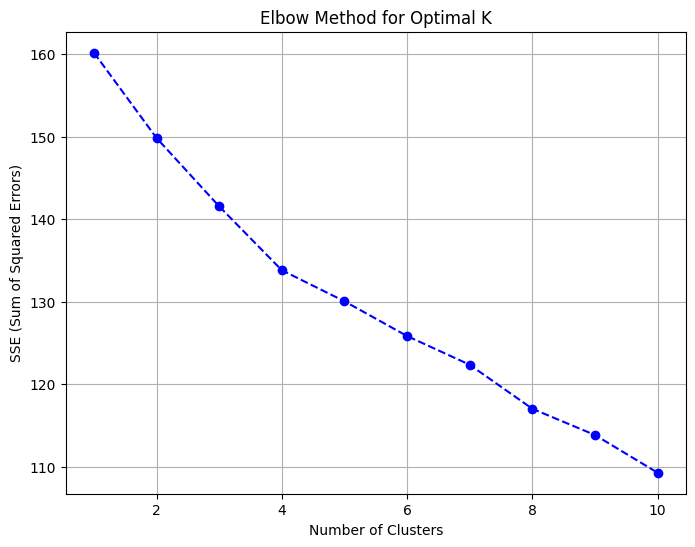

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Requirement Skill-Company'].astype(str))

# Determine the optimal number of clusters using the Elbow Method
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Print or visualize the SSE values for different k
print("SSE values for different k:")
for k, sse_value in enumerate(sse, start=1):
    print(f"Number of clusters: {k}, SSE: {sse_value:.2f}")

# Visualize the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


PROSES KMEANS

In [ ]:
# Choose the optimal K (e.g., based on the elbow method plot)
optimal_k_elbow = 4

In [ ]:
# Perform KMeans clustering with the optimal number of clusters
kmeans_elbow = KMeans(n_clusters=optimal_k_elbow, random_state=42)
kmeans_elbow.fit(X)

# Display cluster results for elbow method
word_clusters_elbow = kmeans_elbow.labels_
clusters_elbow = {}

In [ ]:
# Display words in each cluster
feature_names = vectorizer.get_feature_names_out()
for i, word in enumerate(feature_names):
    cluster = word_clusters_elbow[i]
    if cluster not in clusters_elbow:
        clusters_elbow[cluster] = []
    clusters_elbow[cluster].append(word)

In [ ]:
# Display words in each cluster for elbow method
for cluster, words in clusters_elbow.items():
    print("Cluster (Elbow Method)", cluster)
    print(words)
    print()

Cluster (Elbow Method) 2
['accounting', 'ajax', 'apis', 'automation', 'control', 'development', 'django', 'end', 'engineering', 'experience', 'express', 'functional', 'ibm', 'illustrator', 'information', 'ios', 'java', 'js', 'mvc', 'net', 'network', 'networking', 'node', 'nosql', 'oracle', 'oriented', 'partnerships', 'patterns', 'photoshop', 'supply', 'svn', 'tdd', 'technologies', 'technology', 'unit', 'user']

Cluster (Elbow Method) 0
['administration', 'adobe', 'agile', 'analytical', 'analytics', 'android', 'application', 'applications', 'attention', 'backend', 'bash', 'big', 'communication', 'communications', 'computing', 'creative', 'cross', 'css', 'css3', 'databases', 'db2', 'design', 'devops', 'dynamics', 'full', 'gathering', 'git', 'hadoop', 'html5', 'infrastructure', 'javascript', 'jenkins', 'jira', 'mobile', 'php', 'postgresql', 'problem', 'product', 'programming', 'project', 'python', 'quality', 'rails', 'react', 'redis', 'redux', 'requirement', 'research', 'rest', 'services'

SC

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Number of clusters (Silhouette Method): 2, Silhouette Score: 0.07
Number of clusters (Silhouette Method): 3, Silhouette Score: 0.07
Number of clusters (Silhouette Method): 4, Silhouette Score: 0.08
Number of clusters (Silhouette Method): 5, Silhouette Score: 0.10
Number of clusters (Silhouette Method): 6, Silhouette Score: 0.09
Number of clusters (Silhouette Method): 7, Silhouette Score: 0.10
Number of clusters (Silhouette Method): 8, Silhouette Score: 0.12
Number of clusters (Silhouette Method): 9, Silhouette Score: 0.13
Number of clusters (Silhouette Method): 10, Silhouette Score: 0.14


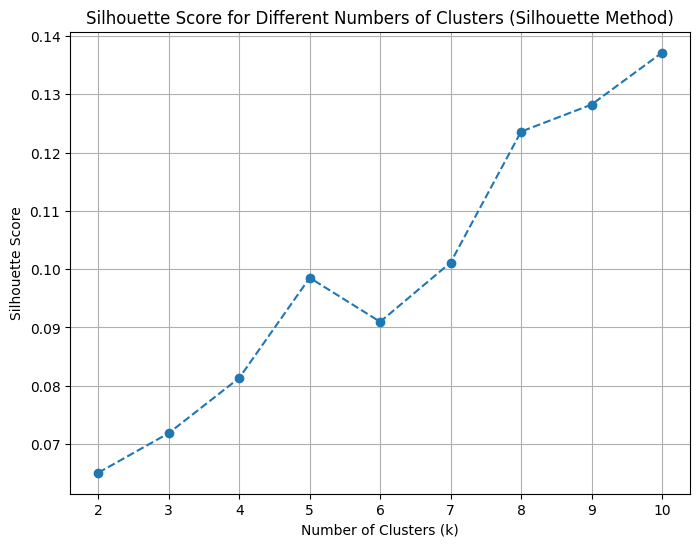

In [ ]:
from sklearn.metrics import silhouette_score
# Menghitung skor silhouette untuk setiap nilai k dari 2 hingga 10 (Silhouette Method)
silhouette_scores = []
for k in range(2, 11):
    kmeans_silhouette = KMeans(n_clusters=k)
    kmeans_silhouette.fit(X)
    labels_silhouette = kmeans_silhouette.labels_
    silhouette_avg = silhouette_score(X, labels_silhouette)
    silhouette_scores.append(silhouette_avg)

# Menampilkan hasil skor silhouette untuk setiap nilai k
for k, silhouette_avg in enumerate(silhouette_scores, start=2):
    print(f"Number of clusters (Silhouette Method): {k}, Silhouette Score: {silhouette_avg:.2f}")

# Memvisualisasikan grafik skor silhouette
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Different Numbers of Clusters (Silhouette Method)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [ ]:
# Choose the optimal K (e.g., based on the silhouette method)
optimal_k_silhouette = 10

In [ ]:
# Perform KMeans clustering with the optimal number of clusters (Silhouette Method)
kmeans_silhouette = KMeans(n_clusters=optimal_k_silhouette, random_state=42)
kmeans_silhouette.fit(X)

# Display cluster results for silhouette method
word_clusters_silhouette = kmeans_silhouette.labels_
clusters_silhouette = {}
feature_names = vectorizer.get_feature_names_out()
for i, word in enumerate(feature_names):
    cluster = word_clusters_silhouette[i]
    if cluster not in clusters_silhouette:
        clusters_silhouette[cluster] = []
    clusters_silhouette[cluster].append(word)

# Display words in each cluster for silhouette method
for cluster, words in clusters_silhouette.items():
    print("Cluster (Silhouette Method)", cluster)
    print(words)
    print()

Cluster (Silhouette Method) 4
['accounting', 'ajax', 'automation', 'end', 'engineering', 'experience', 'express', 'ios', 'java', 'js', 'mvc', 'net', 'network', 'oracle', 'svn', 'tdd', 'technology', 'user']

Cluster (Silhouette Method) 6
['administration', 'amazon', 'functional', 'golang', 'google', 'html', 'sdlc', 'security', 'server']

Cluster (Silhouette Method) 0
['adobe', 'agile', 'analytics', 'application', 'applications', 'backend', 'bash', 'big', 'communications', 'computing', 'cross', 'css', 'databases', 'design', 'dynamics', 'full', 'hadoop', 'html5', 'infrastructure', 'javascript', 'mobile', 'postgresql', 'problem', 'project', 'python', 'quality', 'rails', 'services', 'skills', 'software', 'system', 'web']

Cluster (Silhouette Method) 1
['analytical', 'android', 'angularjs', 'attention', 'control', 'creative', 'development', 'devops', 'illustrator', 'information', 'networking', 'node', 'nosql', 'sales', 'sap', 'sas', 'supply', 'team', 'technologies', 'testing', 'unit', 'vue',

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index for both methods
db_index_elbow = davies_bouldin_score(X.toarray(), labels=kmeans_elbow.labels_)
db_index_silhouette = davies_bouldin_score(X.toarray(), labels=kmeans_silhouette.labels_)

print(f"Davies-Bouldin Index (Elbow Method): {db_index_elbow:.4f}")
print(f"Davies-Bouldin Index (Silhouette Method): {db_index_silhouette:.4f}")

Davies-Bouldin Index (Elbow Method): 3.1016
Davies-Bouldin Index (Silhouette Method): 2.3328
